# Wine Quality data
### Data from: [Cortez et al., 2009](https://archive.ics.uci.edu/ml/datasets/wine+quality) 
#### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Until the 1980s, mainly sparkling red wine was produced, then the situation was reversed and now about 85% of all Vino Verde is white wine.

## 1. Look around the data

In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)

import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### Column descriptions: 

##### fixed acidity:  
##### volatile acidity: 
##### citric acid:  
##### redisual sugar: 
##### chlorides:  
##### free sulfur dioxide: 
##### total sulfur dioxide: 
##### density: 
##### pH: 
##### sulphates:  
##### alcohol:
##### quality: (0 ~ 10)

In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
print("The total number of data in red wine dataset: ", red.shape[0]*red.shape[1])
print("The total number of null values in red wine dataset: {} and it occupies {:.2f}% of the total ".format(red.isnull().sum().sum(), (red.isnull().sum().sum()*100)/(red.shape[0]*red.shape[1])))
print("The total number of data in white wine dataset: ", white.shape[0]*white.shape[1])
print("The total number of null values in white wine dataset: {} and it occupies {:.2f}% of the total ".format(white.isnull().sum().sum(), (white.isnull().sum().sum()*100)/(white.shape[0]*white.shape[1])))

The total number of data in red wine dataset:  19188
The total number of null values in red wine dataset: 0 and it occupies 0.00% of the total 
The total number of data in white wine dataset:  58776
The total number of null values in white wine dataset: 0 and it occupies 0.00% of the total 


## 2.Questions
### *Which characteristic is the most related with 'quality' in wine?
### *Let's make a model to predict the quality of wines.


## 3. Data Preprocessing


### 3-1. Combine the datasets.

In [7]:
red['tag'] = 'r'
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,r
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,r
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,r
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r


In [8]:
white['tag'] = 'w'
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,w
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,w
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,w
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,w


In [9]:
wine = pd.concat([red, white])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,r
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,r
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,w
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,w
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,w
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,w


In [10]:
wine.shape

(6497, 13)

In [11]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

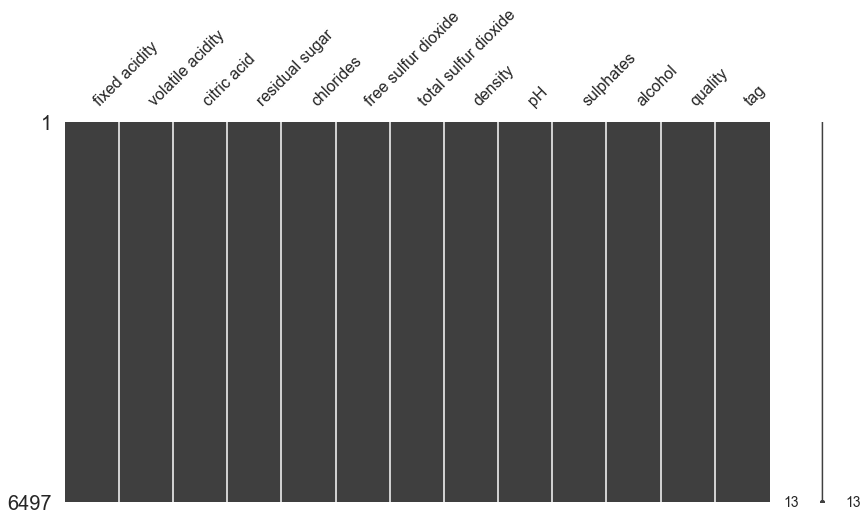

In [12]:
#simplifying the null values by a visualization.
import missingno
missingno.matrix(wine, figsize =(14,7))

## 4.EDA & Visualization

### 4-1.Quality Check

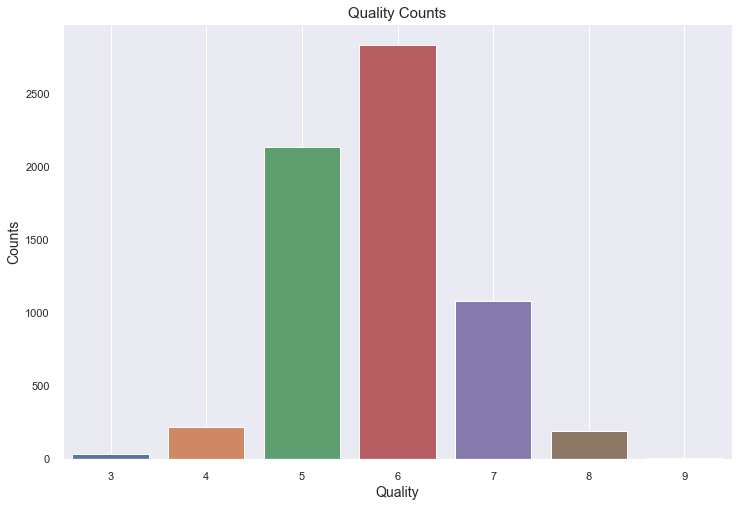

In [13]:
# Check how many wines exist in wine dataset according to 'quality'
# Keep in mind that the 'quality' is the main idea in this project!

plt.figure(figsize = (12, 8))
sns.countplot(data = wine, x = 'quality')

plt.title('Quality Counts', fontsize=15)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Counts', fontsize=14)

plt.grid()



In [14]:
# Draw the graph dividing the wine data into 'Red'/'White'
tag1 = wine.groupby(['tag'])['quality'].value_counts().unstack(0)
tag1

tag,r,w
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


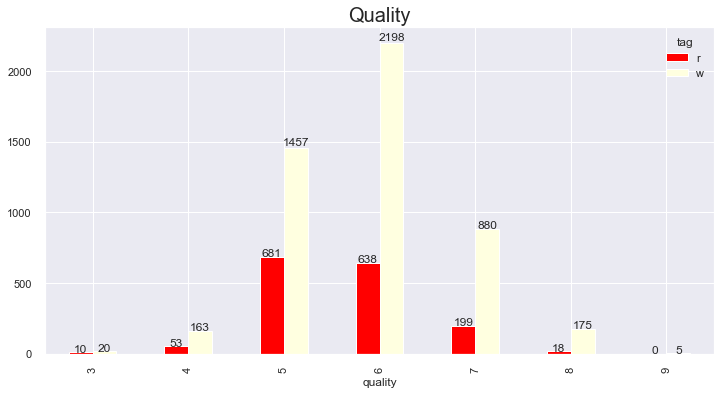

In [15]:
#Distribution of 'quality' in red/white wine?

ax = tag1.plot(kind = 'bar', color = ['red', 'lightyellow'], figsize=(12,6))

ax.set_title('Quality', size=20)

# Add the the count details on graph
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(height), (left+width/2, height*1.01), ha='center')

### 4-2. Check the distribution of each columns.

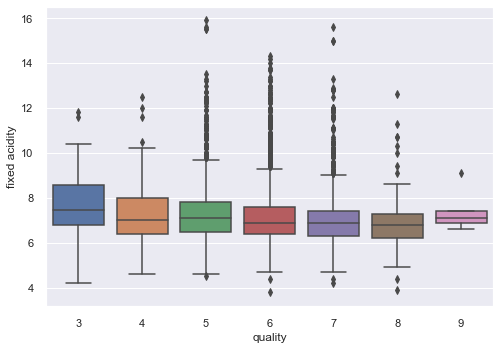

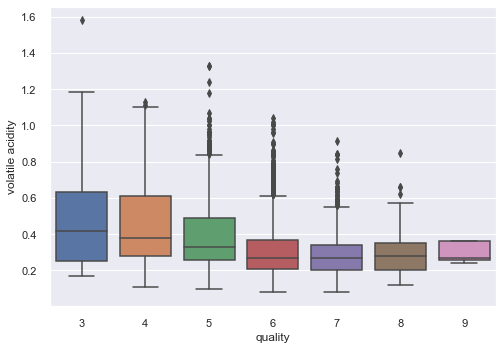

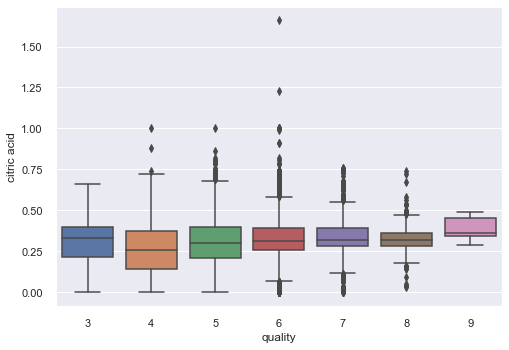

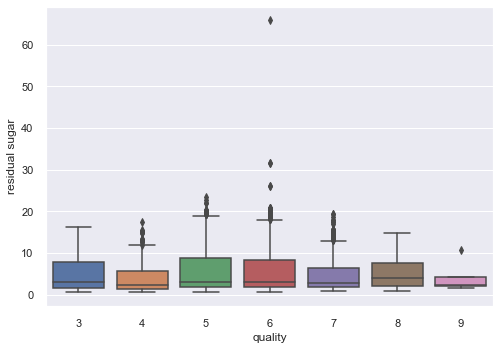

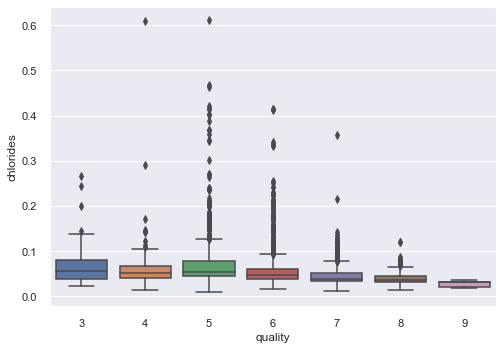

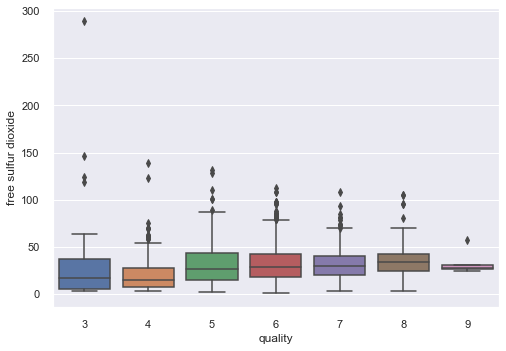

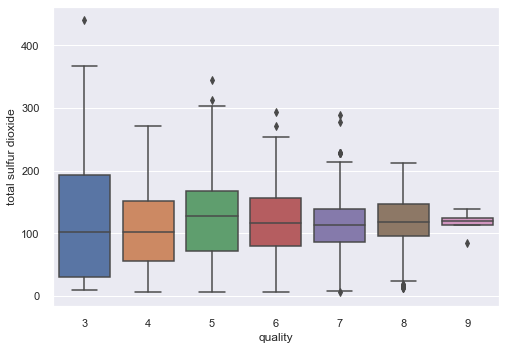

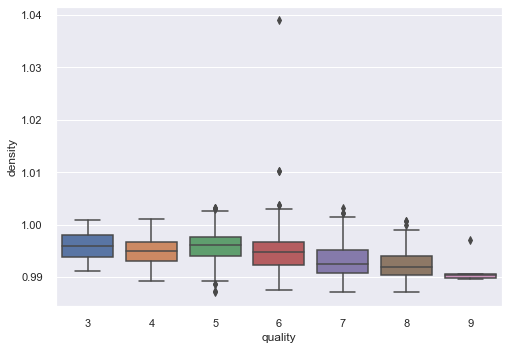

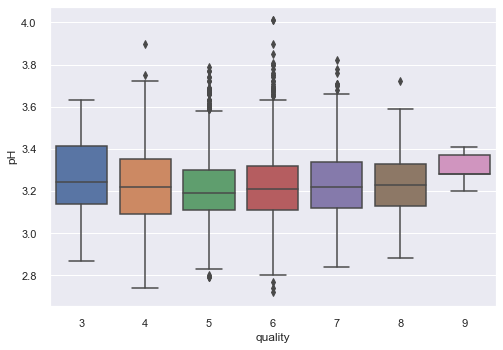

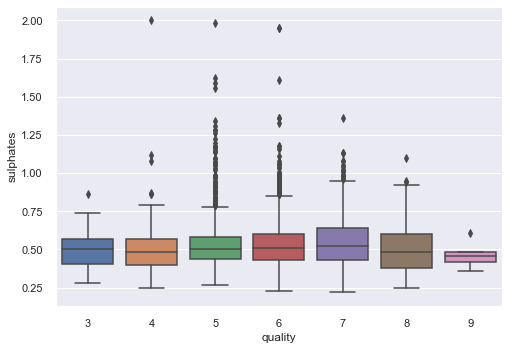

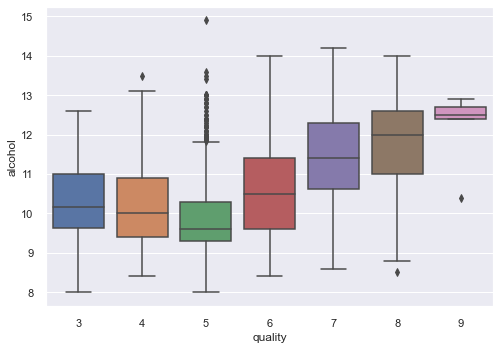

In [16]:
# Draw several graphs in one figure plot
# bot plot
for i in wine.columns:
    if i == "quality":
        break
    sns.boxplot('quality', i, data=wine)
    plt.show()

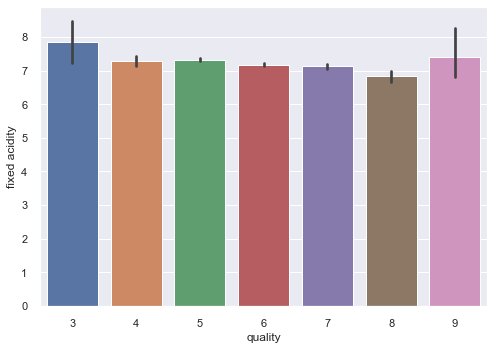

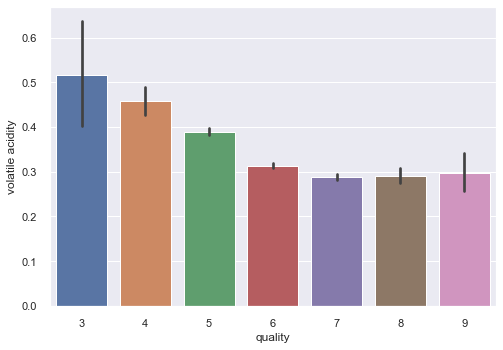

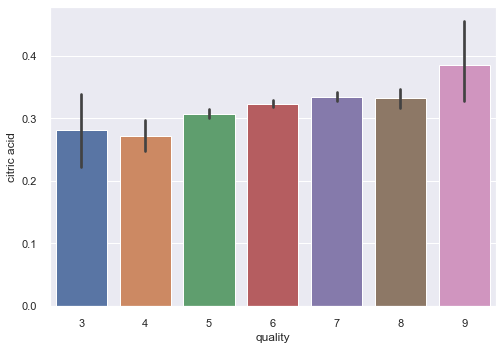

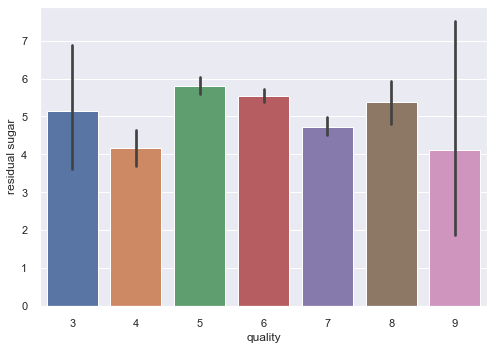

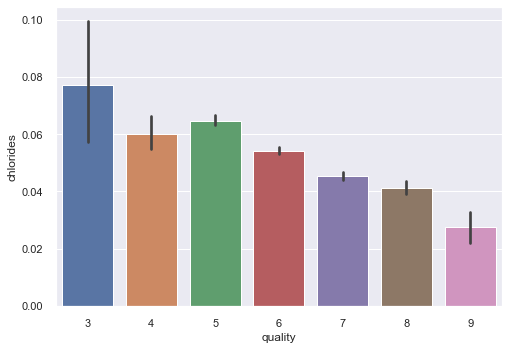

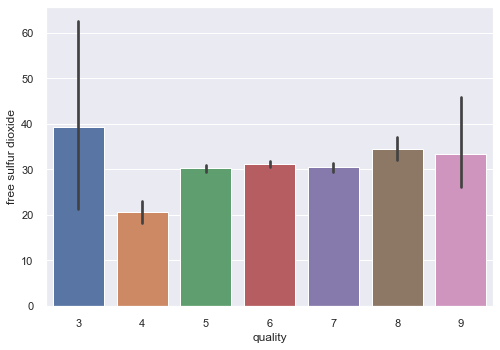

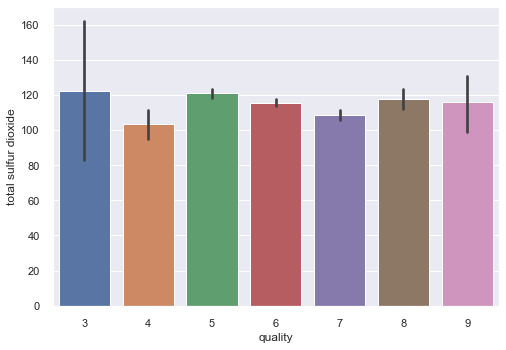

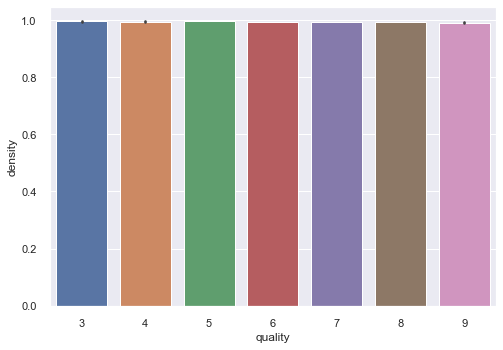

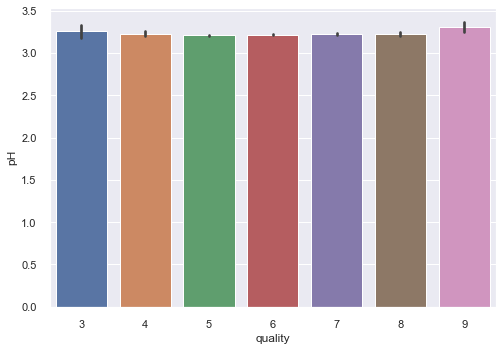

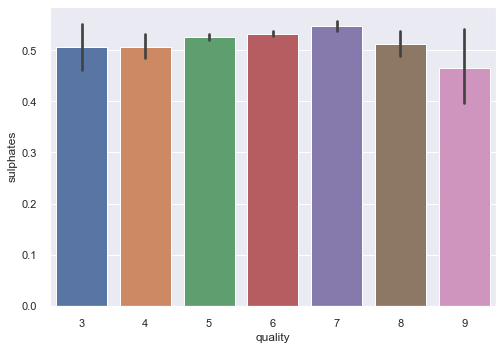

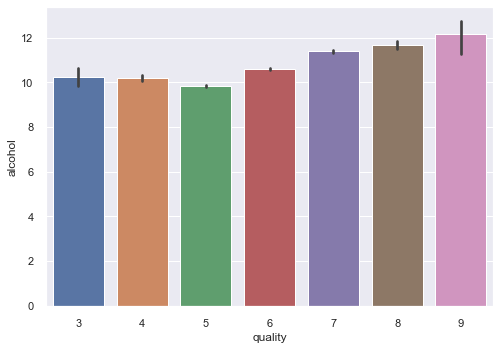

In [17]:
# Draw several graphs in one figure plot
# bar plot
for i in wine.columns:
    if i == 'quality':
        break
    sns.barplot('quality',i,data=wine)
    plt.show()

In [18]:
wine = wine.reset_index()

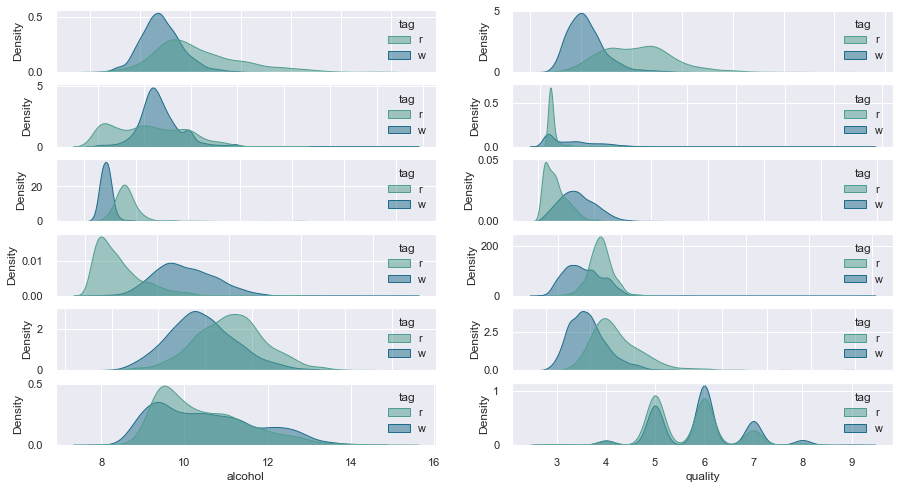

In [19]:
f, ax = plt.subplots(6, 2, figsize=(15, 8))

sns.kdeplot(data=wine, x='fixed acidity', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[0,0])
sns.kdeplot(data=wine, x='volatile acidity', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[0,1])
sns.kdeplot(data=wine, x='citric acid', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[1,0])
sns.kdeplot(data=wine, x='residual sugar', hue='tag', fill=True, common_norm=False, palette='crest', alpha=.5, ax=ax[1,1])
sns.kdeplot(data=wine, x='chlorides', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[2,0])
sns.kdeplot(data=wine, x='free sulfur dioxide', fill=True, common_norm=False, palette='crest',alpha=.5, hue='tag', ax=ax[2,1])
sns.kdeplot(data=wine, x='total sulfur dioxide', fill=True, common_norm=False, palette='crest',alpha=.5, hue='tag', ax=ax[3,0])
sns.kdeplot(data=wine, x='density', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[3,1])
sns.kdeplot(data=wine, x='pH', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[4,0])
sns.kdeplot(data=wine, x='sulphates', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[4,1])
sns.kdeplot(data=wine, x='alcohol', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[5,0])
sns.kdeplot(data=wine, x='quality', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[5,1])

plt.show()

### 4-3. Correlation

Text(0.5, 1.0, 'Correlation map for Wine Data')

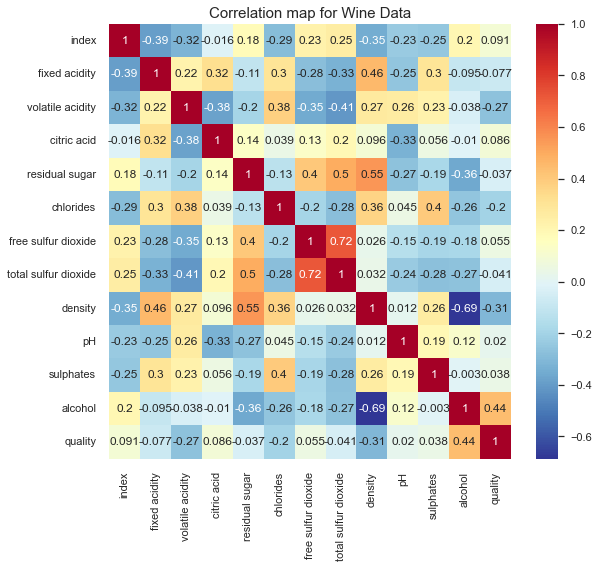

In [20]:
f, ax = plt.subplots(1,1, figsize= (9,8))

corrmat = wine.corr()
sns.heatmap(corrmat, annot=True, cmap='RdYlBu_r', ax=ax)
plt.title("Correlation map for Wine Data", size=15)

## 5. Predict the quality of wine.

### 5-1. Data preprocessing before modeling

In [21]:
# Simplify the wine quality.
# 3~6: bad wine >> 0
# 7~9: good wine >> 1

reviews = []
for score in wine['quality']:
    if score >= 3 and score < 7:
        reviews.append(0)
    else:
        reviews.append(1)
wine['good'] = reviews

In [22]:
wine.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag,good
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r,0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0


In [23]:
wine.groupby(['tag', 'good'])['good'].agg(['count'])

count
tag good       
r   0      1382
    1       217
w   0      3838
    1      1060

In [24]:
# split the wine dataset into 'red' and 'white' 
# modeling the split data and comparing it with each other.
rw = wine[wine.tag == 'r']
ww = wine[wine.tag == 'w']
rw.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag,good
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r,0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0


In [25]:
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [26]:
# Target variable: 'good'
# Explanatory variable: the rest columns

#total
Xt = wine.iloc[:,:-3]
yt = wine['good']

# red wine
Xr = rw.iloc[:,:-3]
yr = rw['good']

# white wine
Xw = ww.iloc[:,:-3]
yw = ww['good']

In [27]:
# Split it into train data and test data
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size = 0.2, random_state=42) #total
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.2, random_state=42) #red
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size = 0.2, random_state=42) #white


In [28]:
# Scaling each columns for them having normal distribution.
scaler = StandardScaler()

#total
Xt_train = scaler.fit_transform(Xt_train)
Xt_test = scaler.fit_transform(Xt_test)

#red
Xr_train = scaler.fit_transform(Xr_train)
Xr_test = scaler.fit_transform(Xr_test)

#white
Xw_train = scaler.fit_transform(Xw_train)
Xw_test = scaler.fit_transform(Xw_test)

### 5-2. Logistic Regression

In [29]:
#total
logt = LogisticRegression()
logt.fit(Xt_train, yt_train)
pred_logt = logt.predict(Xt_test)

#red
logr = LogisticRegression()
logr.fit(Xr_train, yr_train)
pred_logr = logr.predict(Xr_test)

#white
logw = LogisticRegression()
logw.fit(Xw_train, yw_train)
pred_logw = logw.predict(Xw_test)

In [30]:
# Results
print("Accuracy Score: ")
print("Total: {:.2f}, Red: {:.2f}, White: {:.2f}".format(accuracy_score(pred_logt, yt_test), accuracy_score(pred_logr, yr_test), accuracy_score(pred_logw, yw_test)))
print("Classification Report:\n", classification_report(pred_logt, yt_test))
print("Confusion Matrix:\n", confusion_matrix(pred_logt,yt_test))

Accuracy Score: 
Total: 0.83, Red: 0.87, White: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1181
           1       0.29      0.61      0.39       119

    accuracy                           0.83      1300
   macro avg       0.62      0.73      0.64      1300
weighted avg       0.89      0.83      0.85      1300

Confusion Matrix:
 [[1001  180]
 [  47   72]]


### 5-3. Support Vector Machine(SVM)

In [31]:
#total
svct = SVC()
svct.fit(Xt_train, yt_train)
pred_svct = svct.predict(Xt_test)

#red
svcr = SVC()
svcr.fit(Xr_train, yr_train)
pred_svcr = svcr.predict(Xr_test)

#white
svcw = SVC()
svcw.fit(Xw_train, yw_train)
pred_svcw = svcw.predict(Xw_test)

In [32]:
# Results
print("Accuracy Score: ")
print("Total: {:.2f}, Red: {:.2f}, White: {:.2f}".format(accuracy_score(pred_svct,yt_test), accuracy_score(pred_svcr,yr_test), accuracy_score(pred_svcw,yw_test)))

print("classification Report:\n",classification_report(pred_svct,yt_test))
print("confusion Matrix:\n",confusion_matrix(pred_svct,yt_test))

Accuracy Score: 
Total: 0.84, Red: 0.87, White: 0.83
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1177
           1       0.34      0.69      0.45       123

    accuracy                           0.84      1300
   macro avg       0.65      0.77      0.68      1300
weighted avg       0.90      0.84      0.86      1300

confusion Matrix:
 [[1010  167]
 [  38   85]]


### 5-4. Random Forest Classifier

In [33]:
#total
rfct = RandomForestClassifier()
rfct.fit(Xt_train, yt_train)
pred_rfct = rfct.predict(Xt_test)

#red
rfcr = RandomForestClassifier()
rfcr.fit(Xr_train, yr_train)
pred_rfcr = rfcr.predict(Xr_test)

#white
rfcw = RandomForestClassifier()
rfcw.fit(Xw_train, yw_train)
pred_rfcw = rfcw.predict(Xw_test)

In [34]:
# Results
print("Accuracy Score: ")
print("Total: {:.2f}, Red: {:.2f}, White: {:.2f}" .format(accuracy_score(pred_rfct, yt_test), accuracy_score(pred_rfcr, yr_test), accuracy_score(pred_rfcw, yw_test)))
print("Classification Report:\n", classification_report(pred_rfct, yt_test))
print("Confusion Matrix:\n", confusion_matrix(pred_rfct, yt_test))

Accuracy Score: 
Total: 0.89, Red: 0.88, White: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      1128
           1       0.55      0.80      0.65       172

    accuracy                           0.89      1300
   macro avg       0.76      0.85      0.79      1300
weighted avg       0.91      0.89      0.89      1300

Confusion Matrix:
 [[1014  114]
 [  34  138]]


### 5-5. Visualize the modeling results.

In [35]:
# Gather the results of total, red, and white wine from 3 different algorithms.
rest = [accuracy_score(pred_logt, yt_test), accuracy_score(pred_svct, yt_test), accuracy_score(pred_rfct, yt_test)]
resr = [accuracy_score(pred_logr, yr_test), accuracy_score(pred_svcr, yr_test), accuracy_score(pred_rfcr, yr_test)]
resw = [accuracy_score(pred_logw, yw_test), accuracy_score(pred_svcw, yw_test), accuracy_score(pred_rfcw, yw_test)]


In [36]:
df = pd.DataFrame(np.c_[rest, resr, resw], columns = ['Total', 'Red', 'White'], index=['Log', 'SVC', 'RFC'])
df

,Total,Red,White
Log,0.825385,0.868750,0.798980
SVC,0.842308,0.871875,0.826531
RFC,0.886154,0.881250,0.875510


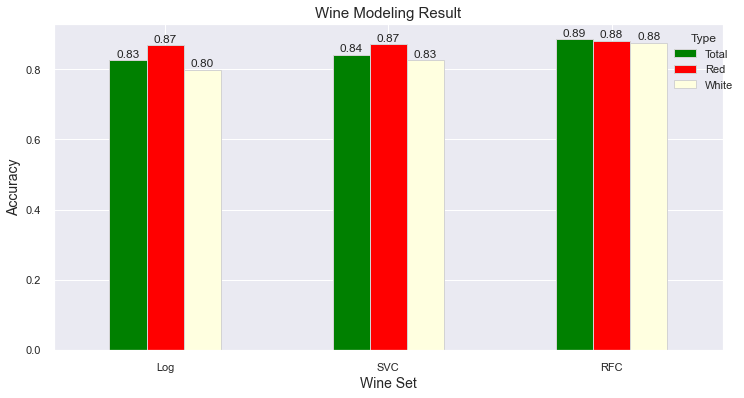

In [37]:
ax = df.plot(kind = 'bar', color = ['green', 'red', 'lightyellow'], edgecolor = 'lightgray', figsize=(12,6))
ax.set_title("Wine Modeling Result", fontsize=15)
ax.set_xticklabels(['Log', 'SVC', 'RFC'], rotation=0)
ax.legend(title = "Type", bbox_to_anchor= (1.03, 1))
plt.xlabel("Wine Set", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

# Add details of accuracy_score on the each bars
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds # adjust the
    ax.annotate("%.2f"%(height), (left+width/2, height*1.01), ha = 'center')

## 6. Review

### Q: Which characteristic is the most related with the quality of wine?
#### A: We can identify it from the analysis of the correlation.

### Let's make a model to predict the quality of wine.
#### A: Now, I finally can compare the red/white/total wine data by several machine learning models. Consequently, RFC's model performance is the best.
